<a href="https://colab.research.google.com/github/mrkustik1985/python/blob/main/lab_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 30% баллов**, т.е. за задание 1 нужно получить минимум 3 балла, за задание 2 - минимум 6 баллов и задание 3 - минимум 9 баллов.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [4]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [19]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Физик-ядерщик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()
for i in data['items']:
  print(i['address'])


{'city': None, 'street': None, 'building': None, 'lat': None, 'lng': None, 'description': None, 'raw': 'Москва, ул. Введенского, д. 1, м. Калужская', 'metro': None, 'metro_stations': [], 'id': '170835'}
{'city': 'Москва', 'street': 'Бережковская набережная', 'building': '30к1', 'lat': 55.729934, 'lng': 37.548016, 'description': None, 'raw': 'Москва, Бережковская набережная, 30к1', 'metro': {'station_name': 'Киевская', 'line_name': 'Кольцевая', 'station_id': '5.49', 'line_id': '5', 'lat': 55.74361, 'lng': 37.56735}, 'metro_stations': [{'station_name': 'Киевская', 'line_name': 'Кольцевая', 'station_id': '5.49', 'line_id': '5', 'lat': 55.74361, 'lng': 37.56735}, {'station_name': 'Лужники', 'line_name': 'МЦК', 'station_id': '95.535', 'line_id': '95', 'lat': 55.720278, 'lng': 37.563056}], 'id': '5828243'}


Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [92]:
data['pages']

1

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [ ]:
import time
URL = 'https://api.hh.ru/vacancies?search_period=30'

params = [{'text': "junior backend c++",'area' : 1, 'per_page' : 50}, 
          {'text':"junior backend python", 'area' : 1, 'per_page' : 50}, 
          {'text' : "ml engineer", 'area' : 1, 'per_page' : 50}, 
          {"text": "продуктовый аналитик", "area" : 1, 'per_page' : 50}, 
          {"text":"мясник", "area" : 2, 'per_page':'50'}]
data_profession = {"junior backend c++" : [],
                   "junior backend python" : [], 
                   "ml engineer" : [],
                   "продуктовый аналитик" : [], 
                   "мясник": []}

cnt_pages_max = 100
for i in range(len(params)):
  for number_pages in range(cnt_pages_max):
    print(i, number_pages)
    params[i]['page'] = f"{number_pages}"
    req = requests.get(URL, params[i]).json()
    time.sleep(0.1)
    if 'items' not in req or req['items'] == []:
      break
    for x in req['items']:
      data_profession.setdefault(params[i]['text'], []).append({"name" : x["name"], "area" : x["area"], "address" : x["address"], "employer" : x["employer"]["name"]})

(1 балл) Посчитайте сколько всего найдено вакансий:

In [11]:
for i in data_profession.keys():
  print(f"По специальности {i} найдено {len(data_profession[i])} вакансий")

По специальности junior backend c++ найдено 5 вакансий
По специальности junior backend python найдено 13 вакансий
По специальности ml engineer найдено 257 вакансий
По специальности продуктовый аналитик найдено 2000 вакансий
По специальности финансовый аналитик найдено 0 вакансий
По специальности мясник найдено 30 вакансий


\\(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [42]:
class Company:
    def __init__(self, category, pattern):
      self.is_coords = False
      self.company_name = pattern['employer']
      if 'address' in pattern and pattern['address'] != None:
        if 'lat' in pattern['address'] and pattern['address']['lat'] != None:
          self.coords = (pattern['address']['lat'], pattern['address']['lng'])
          self.is_coords = True
      self.category = category
      self.name_vacancy = pattern['name']
    def have_coords(self):
      return self.is_coords
    def category(self):
      return self.category

(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [43]:
company_data = []
for name_category, vacancy_array in data_profession.items():
  if name_category == None:
    continue
  for vacancy in vacancy_array:
    if vacancy == None:
      continue
    company_data.append(Company(name_category, vacancy))


(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [46]:
cnt_vacancy_with_coords = {"junior backend c++" : 0, 
                   "junior backend python" : 0, 
                   "ml engineer" : 0, 
                   "продуктовый аналитик" : 0, 
                   "мясник": 0}

for company in company_data:
  if company.have_coords():
    cnt_vacancy_with_coords[company.category] = cnt_vacancy_with_coords.get(company.category, 0) + 1
for i in cnt_vacancy_with_coords.keys():
  print(f"запрос {i} имеет {cnt_vacancy_with_coords[i]} вакансий с координатами")

запрос junior backend c++ имеет 4 вакансий с координатами
запрос junior backend python имеет 8 вакансий с координатами
запрос ml engineer имеет 101 вакансий с координатами
запрос продуктовый аналитик имеет 922 вакансий с координатами
запрос мясник имеет 23 вакансий с координатами


(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [ ]:
# your code here

(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

In [ ]:
center = (55.753995, 37.614069)


(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве): 

In [ ]:
# your code here

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.

# New Section

Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [2]:
!gdown 1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU

Downloading...
From: https://drive.google.com/uc?id=1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 156MB/s]


Создадим DataFrame:

In [109]:
diamonds = pd.read_csv("diamonds.csv")

(0.5 балла) Выведете первые 5 строк датасета:

In [101]:
diamonds[:5]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [102]:
print(len(diamonds))

219703


(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [103]:
max_cost = max(diamonds['total_sales_price'])
min_cost = min(diamonds['total_sales_price'])
max_index_diam = diamonds['total_sales_price'] == max_cost

In [104]:
diamonds[max_index_diam].index[0], max_cost

(219702, 1449881)

In [105]:
diamonds[min_index_diam].index[0], min_cost

(0, 200)

(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):



In [88]:
cnt_unknown_cells = 0
cnt_known_cells = 0
for column in diamonds:
    for i in range(len(diamonds)):
      if diamonds[column][i] == 'None' or diamonds[column][i] == 'unknown':
        cnt_unknown_cells += 1
      else:
        cnt_known_cells += 1
cnt_unknown_cells

1891168

(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [86]:
for column in diamonds:
    fl = 1
    for i in range(len(diamonds)):
      if diamonds[column][i] == 'None' or diamonds[column][i] == 'unknown':
        fl = 0
    if fl == 0:
      print(column)

color
cut_quality
eye_clean
culet_size
culet_condition
girdle_min
girdle_max
fluor_color
fluor_intensity
fancy_color_dominant_color
fancy_color_secondary_color
fancy_color_overtone
fancy_color_intensity


В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными. 

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [106]:
cnt_column = 0
name_of_column = []
for column in diamonds:
  if 'fancy_color_' in column or 'fluor_' in column:
    cnt_column += 1
    name_of_column.append(column)
cnt_column

6

2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках: 

In [110]:
cnt_known_cells = 0
cnt = 0
for column in name_of_column:
    for i in range(len(diamonds)):
      if diamonds[column][i] != 'None' and diamonds[column][i] != 'unknown':
        cnt_known_cells += 1
      cnt += 1
cnt_known_cells

111586

3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [111]:
for name_to_delete in name_of_column:
  del diamonds[name_to_delete]
diamonds[:5]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,culet_condition,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,unknown,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200


(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [112]:
for name_column in diamonds:
  if 'culet_' in name_column:
    del diamonds[name_column]
diamonds[:5]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200


(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [113]:
diamonds['total_sales_price'].sum()

1517721991

Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [114]:
diamonds[::2]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219694,219695,Round,D,IF,12.52,Excellent,HRD,Excellent,Excellent,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496


(0.5 балла) А теперь с индексами, кратными 6:

In [115]:
diamonds[::6]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,0.0,0.0,0.00,0.00,0.00,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219678,219679,Round,G,VS1,10.23,Excellent,GIA,Excellent,Excellent,unknown,62.7,55.0,13.82,13.92,8.69,TN,M,859320
219684,219685,Radiant,unknown,I1,0.89,unknown,GIA,Good,Good,unknown,63.8,57.0,6.44,4.96,3.16,TK,VTK,982560
219690,219691,Round,D,VVS2,10.10,Excellent,GIA,Excellent,Excellent,unknown,59.4,59.0,14.07,14.15,8.39,M,STK,1040739
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [118]:
categorical_cols = diamonds.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['cut',
 'color',
 'clarity',
 'cut_quality',
 'lab',
 'symmetry',
 'polish',
 'eye_clean',
 'girdle_min',
 'girdle_max']

>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

\(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [119]:
diamonds['total_sales_price'] * diamonds['total_sales_price'] 

0                 40000
1                 40000
2                 40000
3                 40000
4                 40000
              ...      
219698    1465775118864
219699    1670556250000
219700    1730529726016
219701    1822500000000
219702    2102154914161
Name: total_sales_price, Length: 219703, dtype: int64

### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

In [ ]:
# your code here

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

In [ ]:
# your code here

(2 балла) Постройте график `вес бриллианта - стоимость`:

In [ ]:
# your code here

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

In [ ]:
# your code here

(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

Ваши выводы здесь :)

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно: 
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк: 

In [123]:
diamonds = pd.read_csv("diamonds.csv")
diamonds[:10]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
5,5,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.81,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.84,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
7,7,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,M,unknown,None,unknown,unknown,unknown,unknown,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.85,STK,TK,unknown,None,unknown,unknown,unknown,unknown,200
9,9,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.80,M,M,unknown,None,unknown,unknown,unknown,unknown,200


(1 балл) Перемешайте строки в датафрейме случайным образом: 

In [122]:
diamonds.sample(frac=1)

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
182769,182770,Round,I,SI1,1.00,Excellent,GIA,Excellent,Excellent,unknown,...,3.87,M,M,unknown,None,unknown,unknown,unknown,unknown,8385
122784,122785,Marquise,J,SI2,0.84,unknown,GIA,Very Good,Very Good,Yes,...,3.28,unknown,unknown,unknown,Medium,unknown,unknown,unknown,unknown,2628
185929,185930,Round,H,SI1,1.06,Excellent,GIA,Excellent,Excellent,Yes,...,4.05,M,STK,unknown,None,unknown,unknown,unknown,unknown,8930
70245,70246,Round,E,VVS2,0.29,Very Good,GIA,Excellent,Excellent,unknown,...,2.62,unknown,unknown,unknown,None,unknown,unknown,unknown,unknown,1052
12079,12079,Round,G,SI2,0.30,Excellent,GIA,Excellent,Excellent,unknown,...,2.69,unknown,unknown,unknown,Medium,unknown,unknown,unknown,unknown,654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212647,212648,Pear,I,SI2,3.01,unknown,GIA,Very Good,Excellent,unknown,...,4.66,STK,STK,unknown,None,unknown,unknown,unknown,unknown,32075
100746,100747,Round,K,VS2,0.55,Excellent,GIA,Excellent,Excellent,unknown,...,3.26,unknown,unknown,unknown,Medium,unknown,unknown,unknown,unknown,1652
179624,179625,Princess,unknown,VS2,1.13,unknown,GIA,Very Good,Very Good,unknown,...,4.30,unknown,unknown,unknown,Faint,Yellow,unknown,None,Fancy Light,7425
10817,10817,Round,K,VS2,0.30,Excellent,GIA,Excellent,Excellent,unknown,...,2.67,STK,STK,unknown,None,unknown,unknown,unknown,unknown,640


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [125]:
diamonds['minkovskie_sum'] = (diamonds['carat_weight'] ** 3 + diamonds['meas_depth'] ** 3 + diamonds['total_sales_price']) ** (1 / 3)
diamonds['minkovskie_sum']

0           5.903417
1           5.902503
2           5.901598
3           5.902503
4           5.906221
             ...    
219698    106.635010
219699    108.938111
219700    109.764165
219701    110.522105
219702    113.218769
Name: minkovskie_sum, Length: 219703, dtype: float64

(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`: 

In [126]:
new_dataset = pd.DataFrame(diamonds, columns = ['minkovskie_sum', 'total_sales_price'])
new_dataset

,minkovskie_sum,total_sales_price
0,5.903417,200
1,5.902503,200
2,5.901598,200
3,5.902503,200
4,5.906221,200
...,...,...
219698,106.635010,1210692
219699,108.938111,1292500
219700,109.764165,1315496
219701,110.522105,1350000


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [128]:
from sklearn.model_selection import train_test_split

In [214]:
train, test = train_test_split(new_dataset, train_size=0.8)
train.sort_index()
bad_train = set()
for column in train:
    id = 0
    for x in train[column]:
      if x == 'None' or x == 'unknown':
        bad_train.add(id)
      id += 1
test.sort_index()
bad_test = set()
for column in test:
    id = 0
    for x in test[column]:
      if x == 'None' or x == 'unknown':
        print(x)
        bad_test.add(id)
      id += 1
len(bad_train), len(bad_test)

(0, 0)

In [215]:
train

,minkovskie_sum,total_sales_price
87105,10.987349,1312
167564,17.526624,5325
206029,28.450249,22961
10733,8.702457,640
7753,8.605494,618
...,...,...
42766,9.631239,876
126584,14.095040,2760
48796,9.775651,922
194351,23.267879,12464


In [216]:
test

,minkovskie_sum,total_sales_price
185858,20.788852,8918
47901,9.775736,916
113236,12.724981,2026
29198,9.369136,804
52990,9.865384,940
...,...,...
168830,18.398324,6141
27652,9.268977,784
143957,15.205664,3471
130531,14.299688,2898



(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

In [139]:
import matplotlib.pyplot as plt

%matplotlib inline

In [217]:
coord_x_train = train['minkovskie_sum'].values.tolist() 
coord_y_train = train['total_sales_price'].values.tolist()
coord_train = []
for i in range(len(coord_x_train)):
  coord_train.append((coord_x_train[i], coord_y_train[i]))
coord_train.sort()
coord_x_train = []
coord_y_train = []
for i in range(len(coord_train)):
  coord_x_train.append(coord_train[i][0])
  coord_y_train.append(coord_train[i][1])

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

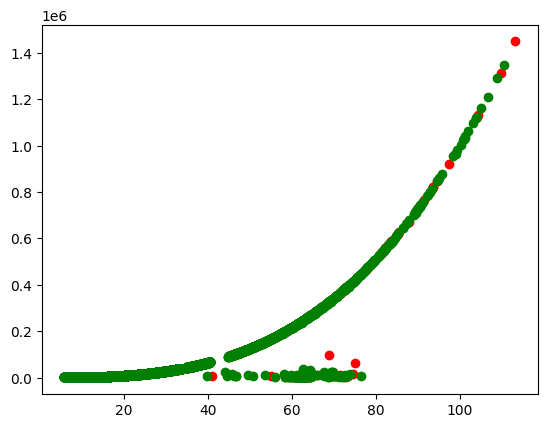

In [218]:
coord_x_test = test['minkovskie_sum'].values.tolist() 
coord_y_test = test['total_sales_price'].values.tolist()
coord_test = []
for i in range(len(coord_x_test)):
  coord_test.append((coord_x_test[i], coord_y_test[i]))
coord_test.sort()
coord_x_test = []
coord_y_test = []
for i in range(len(coord_test)):
  coord_x_test.append(coord_test[i][0])
  coord_y_test.append(coord_test[i][1])
plt.scatter(coord_x_test, coord_y_test, c = 'red')
plt.scatter(coord_x_train, coord_y_train, c = 'green')
plt.show()

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [ ]:
# your code here

(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [ ]:
# your code here

**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [ ]:
# your code here

(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [ ]:
# your code here

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [ ]:
# your code here

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [ ]:
# your code here

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Ваши выводы здесь :)